# Assignment #2
## Pandas and Visualization

### Getting Data
Select a dataset from [Toronto Open Data](https://open.toronto.ca/catalogue/) or another data portal of your choice, and download it. Some suggested datasets are linked below and additionally available for download in [the course repo /data folder](https://github.com/amfz/dsi-python-workshop/tree/main/data). A good dataset for this exercise will have a mix of data types.

Some sugested datasets:
* [TTC bus delays](https://open.toronto.ca/dataset/ttc-bus-delay-data/): Fewer columns, not well documented, some NaNs. Similar to data we've worked with in class. Recommend choosing a full year of data.
* [Apartment building evaluations](https://open.toronto.ca/dataset/apartment-building-evaluation/): Lots of columns, well-documented, some NaNs.
* [Daily shelter overnight service occupancy and capcity](https://open.toronto.ca/dataset/daily-shelter-overnight-service-occupancy-capacity/): The largest of the datasets suggested. Lots of columns, well-documented, more NaNs.

### Metadata Review
1. What organization publishes this dataset? 
   ***City of Toronto***
2. How frequently is the dataset updated? 
   ***Daily***
3. What metadata is available (e.g., column names, data types, descriptions)?
   ***Column Names, Data Types and Non-Null Counts***
4. Is there documentation about who or what produces the data? About who collects it? Through what processes?
   ***Yes. The data is administered by Shelter, Support & Housing Administration of City of Toronto. Here is the link how they gather the data: https://www.toronto.ca/city-government/data-research-maps/research-reports/housing-and-homelessness-research-and-reports/shelter-census/***
5. Is there documentation about limitations of the data, such as possible sources of error or omission?
   ***Yes. Here is the limitations: This is unaudited data compiled directly from an administrative database. Data reflect only the state of each program's records in the database and may not always accurately reflect the actual current situation in each program.***
6. Are there any restrictions concerning data access or use? (e.g.,registraton required or non-commercial use only).
   ***There is no restriction based on this Open Data License: https://open.toronto.ca/open-data-license/***

### Getting started --> ***PLEASE SEE THE CODES BELOW***
1. Load the data to a single DataFrame.
2. Profile the DataFrame.
   * What are the column names?
   * What are the dtypes when loaded? Do any not make sense?
   * How many NaNs are in each column?
   * What is the shape of the DataFrame?
3. Generate some summary statistics for the data.
   * For numeric columns: What are the max, min, mean, and median?
   * For text columns: What is the most common value? How many unique values are there?
   * Are there any statistics that seem unexpected?
4. Rename one or more columns in the DataFrame.
5. Select a single column and find its unique values.
6. Select a single text/categorical column and find the counts of its values.
7. Convert the data type of at least one of the columns. If all columns are typed correctly, convert one to `str` and back.
8. Write the DataFrame to a different file format than the original.

### More data wrangling, filtering  --> ***PLEASE SEE THE CODES BELOW***
1. Create a column derived from an existing one. Some possibilities:
   * Bin a continuous variable
   * Extract a date or time part (e.g. hour, month, day of week)
   * Assign a value based on the value in another column (e.g. TTC line number based on line values in the subway delay data)
   * Replace text in a column (e.g. replacing occurrences of "Street" with "St.")
2. Remove one or more columns from the dataset.
3. Extract a subset of columns and rows to a new DataFrame
   * with the `.query()` method and column selecting `[[colnames]]`
   * with `.loc[]`
4. Investigate null values
   * Create and describe a DataFrame containing records with NaNs in any column
   * Create and describe a DataFrame containing records with NaNs in a subset of columns
   * If it makes sense to drop records with NaNs in certain columns from the original DataFrame, do so.

### Grouping and aggregating
1. Use `groupby()` to split your data into groups based on one of the columns.
2. Use `agg()` to apply multiple functions on different columns and create a summary table. Calculating group sums or standardizing data are two examples of possible functions that you can use.

### Plot
1. Plot two or more columns in your data using `matplotlib`, `seaborn`, or `plotly`. Make sure that your plot has labels, a title, a grid, and a legend.

In [10]:
### ***GETTING STARTED***

###1. Load the data to a single DataFrame.
import pandas as pd

daily_shelter = pd.read_csv("/Users/tdsim/OneDrive/Desktop/DSI/Assignment/Python Assignmen 2/SIMATUPANG_TULUS_python_assignment2_orig.csv")

In [3]:
###2. Profile the DataFrame.
   #* What are the column names?

column_names = daily_shelter.loc[daily_shelter["_id"].isna()]

display(column_names.transpose())

""
_id
OCCUPANCY_DATE
ORGANIZATION_ID
ORGANIZATION_NAME
SHELTER_ID
SHELTER_GROUP
LOCATION_ID
LOCATION_NAME
LOCATION_ADDRESS
LOCATION_POSTAL_CODE


In [4]:
###2. Profile the DataFrame.
    #* What are the dtypes when loaded? Do any not make sense?

daily_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48345 entries, 0 to 48344
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     48345 non-null  int64  
 1   OCCUPANCY_DATE          48345 non-null  object 
 2   ORGANIZATION_ID         48345 non-null  int64  
 3   ORGANIZATION_NAME       48345 non-null  object 
 4   SHELTER_ID              48345 non-null  int64  
 5   SHELTER_GROUP           48345 non-null  object 
 6   LOCATION_ID             48345 non-null  int64  
 7   LOCATION_NAME           47980 non-null  object 
 8   LOCATION_ADDRESS        46902 non-null  object 
 9   LOCATION_POSTAL_CODE    46902 non-null  object 
 10  LOCATION_CITY           46882 non-null  object 
 11  LOCATION_PROVINCE       46882 non-null  object 
 12  PROGRAM_ID              48345 non-null  int64  
 13  PROGRAM_NAME            48345 non-null  object 
 14  SECTOR                  48345 non-null

In [5]:
###2. Profile the DataFrame.
    #* How many NaNs are in each column?

NaN_count = daily_shelter.isna().sum()


print(NaN_count)

_id                           0
OCCUPANCY_DATE                0
ORGANIZATION_ID               0
ORGANIZATION_NAME             0
SHELTER_ID                    0
SHELTER_GROUP                 0
LOCATION_ID                   0
LOCATION_NAME               365
LOCATION_ADDRESS           1443
LOCATION_POSTAL_CODE       1443
LOCATION_CITY              1463
LOCATION_PROVINCE          1463
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       15457
CAPACITY_FUNDING_BED      15457
OCCUPIED_BEDS             15457
UNOCCUPIED_BEDS           15457
UNAVAILABLE_BEDS          15457
CAPACITY_ACTUAL_ROOM      32888
CAPACITY_FUNDING_ROOM     32888
OCCUPIED_ROOMS            32888
UNOCCUPIED_ROOMS          32888
UNAVAILABLE_ROOMS         32888
OCCUPANCY_RATE_BEDS       15457
OCCUPANC

In [6]:
###2. Profile the DataFrame.
    #* What is the shape of the DataFrame?

print(daily_shelter.shape)

(48345, 32)


In [11]:
###3. Generate some summary statistics for the data.
   #* For numeric columns: What are the max, min, mean, and median?

shelter_room_summary = (daily_shelter.groupby("SHELTER_GROUP")
                        .agg(Capacity_Actual_Room_COUNT=("CAPACITY_ACTUAL_ROOM", "count"),
                             Capacity_Funding_Room_MAX=("CAPACITY_FUNDING_ROOM", "max"),
                             Occupied_Rooms_MIN=("OCCUPIED_ROOMS", "min"),
                             Unoccupied_Rooms_MEAN=("UNOCCUPIED_ROOMS", "mean"),
                             Unavailable_Rooms_MEDIAN=("UNAVAILABLE_ROOMS", "median")))

shelter_room_summary


,Capacity_Actual_Room_COUNT,Capacity_Funding_Room_MAX,Occupied_Rooms_MIN,Unoccupied_Rooms_MEAN,Unavailable_Rooms_MEDIAN
SHELTER_GROUP,,,,,
351 Lakeshore Respite Services,0,NaN,NaN,NaN,NaN
Birkdale Residence,1825,83.0,8.0,0.300822,0.0
COSTI Reception Centre,1761,150.0,1.0,0.127768,0.0
Christie Ossington Men's Hostel,730,152.0,39.0,0.001370,2.5
Christie Refugee Welcome Centre,365,30.0,24.0,0.186301,0.0
...,...,...,...,...,...
YMCA Sprott House,0,NaN,NaN,NaN,NaN
YWCA - First Stop Woodlawn,0,NaN,NaN,NaN,NaN
YWCA-348 Davenport,0,NaN,NaN,NaN,NaN


In [8]:
###3. Generate some summary statistics for the data.
   #* For text columns: What is the most common value? How many unique values are there?

#common values
common_values = daily_shelter[["LOCATION_NAME", "PROGRAM_NAME"]].apply(lambda x: set(x.dropna()), axis=1).apply(set.intersection)

pd.set_option("display.max_colwidth", None)

print(common_values)

0        {COSTI Hotel Program Dixon, COSTI - Hotel Program - Dixon (Refugee Families)}
1         {COSTI Hotel Program Dixon, COSTI - Hotel Program - Dixon (Refugee Singles)}
2                        {COSTI Reception Centre, COSTI Reception Centre CITY Program}
3           {COSTI Uptown Hotel COVID-19 - Family Program, COSTI Uptown Hotel Program}
4                      {COSTI Uptown Hotel Family Program, COSTI Uptown Hotel Program}
                                             ...                                      
48340                                 {YWCA Davenport Shelter, YWCA Davenport - Youth}
48341        {Youth Without Shelter , Youth without Shelter Emergency Shelter Program}
48342           {Youth Without Shelter , Youth without Shelter Stay In School Program}
48343                                        {YouthLink , YouthLink Emergency Program}
48344                                     {YouthLink Transitional Program, YouthLink }
Length: 48345, dtype: object


In [9]:
#drop duplicates --> for my own analysis to compare between drop duplicates vs unique.

daily_shelter[["LOCATION_NAME", "PROGRAM_NAME"]].drop_duplicates()

,LOCATION_NAME,PROGRAM_NAME
0,COSTI Hotel Program Dixon,COSTI - Hotel Program - Dixon (Refugee Families)
1,COSTI Hotel Program Dixon,COSTI - Hotel Program - Dixon (Refugee Singles)
2,COSTI Reception Centre,COSTI Reception Centre CITY Program
3,COSTI Uptown Hotel Program,COSTI Uptown Hotel COVID-19 - Family Program
4,COSTI Uptown Hotel Program,COSTI Uptown Hotel Family Program
...,...,...
43854,Scott Mission,Scott Mission - Winter Respite
43897,885 Scarborough Golf Club Road,SSHA - Warming Centre - Scarborough Golf Club Road
46944,HFS 195 Princes' Blvd,Dixon Hall Winter Respite - BLC
46961,HFS 195 Princes' Blvd,Fred Victor Winter Respite - BLC


In [10]:
#unique values from LOCATION_NAME & PROGRAM_NAME columns

unique_locations = daily_shelter["LOCATION_NAME"].unique()
unique_programs = daily_shelter["PROGRAM_NAME"].unique()

print("Unique Locations:")
print(unique_locations)

print("\nUnique Programs:")
print(unique_programs)



Unique Locations:
['COSTI Hotel Program Dixon' 'COSTI Reception Centre'
 'COSTI Uptown Hotel Program' 'CONC Etobicoke Hotel Program'
 'CONC West End Hotel Program' "CONC Men's Shelter Lansdowne Ave"
 "CONC Men's Shelter Bloor St W" 'Christie Refugee Welcome Centre'
 'SSHA Birkdale Residence' 'SSHA North York West Hotel Program'
 'SSHA Downsview Dells' 'SSHA Roehampton Hotel Program'
 "Scarborough Women's Shelter - Milner" 'SSHA Family Residence'
 'SSHA Scarborough Hotel Program 3' 'SSHA Scarborough Hotel Program 4'
 'SSHA Fort York Residence' 'SSHA North Hotel Program'
 'Progress Avenue Shelter' 'Robertson House'
 'SSHA Etobicoke Hotel Program' 'SSHA Scarborough Hotel Program 1'
 'SSHA Scarborough Village Residence' 'SSHA Junction Place'
 'SSHA Seaton House' 'SSHA Downtown Response Program'
 'Streets to Homes Assessment and Referral Centre (SHARC)'
 'SSHA Downtown Hotel Program' "SSHA Womens' Residence"
 'Cornerstone Place' 'Covenant House Gerrard St E'
 'Multiple Youth Agencies Downto

In [11]:
#unique values count

print(f"Number of unique programs: {daily_shelter['PROGRAM_NAME'].nunique()}")
print(f"Number of unique locations: {daily_shelter['LOCATION_NAME'].nunique()}")
print("\n")

print(daily_shelter["PROGRAM_NAME"].value_counts())
print("\n")
print(daily_shelter["LOCATION_NAME"].value_counts())


Number of unique programs: 159
Number of unique locations: 112


PROGRAM_NAME
COSTI - Hotel Program - Dixon (Refugee Families)                     365
Fred Victor Uptown Hotel Program                                     365
St. Felix Centre 69 Fraser Respite                                   365
St.Vincent De Paul - St. Clare's Residence - Transitional Housing    365
St.Vincent De Paul - Mary's Home - Emergency Shelter                 365
                                                                    ... 
Dixon Hall Warming Centre - Willowdale                                24
Christie Ossington Warming Centre - Cecil CC                          20
Dixon Hall Winter Respite - BLC                                       11
Fred Victor Winter Respite - BLC                                      11
Christie Ossington Warming Centre - Spadina Rd                         1
Name: count, Length: 159, dtype: int64


LOCATION_NAME
SSHA Seaton House                         1825
HFS 545 Lake Shor

###3. Generate some summary statistics for the data.
   #* Are there any statistics that seem unexpected?

No, there are no any statistics that seem unexpected

In [12]:
###4. Rename one or more columns in the DataFrame.
daily_shelter.rename(columns={"PROGRAM_MODEL": "THE_MODEL_OF_THE_PROGRAM", 
                              "PROGRAM_AREA": "THE_AREA_OF_THE_PROGRAM"}, inplace=True)

print(daily_shelter.columns)


Index(['_id', 'OCCUPANCY_DATE', 'ORGANIZATION_ID', 'ORGANIZATION_NAME',
       'SHELTER_ID', 'SHELTER_GROUP', 'LOCATION_ID', 'LOCATION_NAME',
       'LOCATION_ADDRESS', 'LOCATION_POSTAL_CODE', 'LOCATION_CITY',
       'LOCATION_PROVINCE', 'PROGRAM_ID', 'PROGRAM_NAME', 'SECTOR',
       'THE_MODEL_OF_THE_PROGRAM', 'OVERNIGHT_SERVICE_TYPE',
       'THE_AREA_OF_THE_PROGRAM', 'SERVICE_USER_COUNT', 'CAPACITY_TYPE',
       'CAPACITY_ACTUAL_BED', 'CAPACITY_FUNDING_BED', 'OCCUPIED_BEDS',
       'UNOCCUPIED_BEDS', 'UNAVAILABLE_BEDS', 'CAPACITY_ACTUAL_ROOM',
       'CAPACITY_FUNDING_ROOM', 'OCCUPIED_ROOMS', 'UNOCCUPIED_ROOMS',
       'UNAVAILABLE_ROOMS', 'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS'],
      dtype='object')


In [13]:
###5. Select a single column and find its unique values.
unique_location_city = daily_shelter["LOCATION_CITY"].unique()

print("Unique Location City:")
print(unique_location_city)

Unique Location City:
['Toronto' 'North York' 'Etobicoke' 'Scarborough' 'Vaughan' nan]


In [14]:
###6. Select a single text/categorical column and find the counts of its values.
print(daily_shelter["LOCATION_CITY"].value_counts())

LOCATION_CITY
Toronto        37699
North York      4808
Scarborough     2915
Etobicoke       1095
Vaughan          365
Name: count, dtype: int64


In [15]:
###7. Convert the data type of at least one of the columns. If all columns are typed correctly, convert one to str and back

# original data type

daily_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48345 entries, 0 to 48344
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       48345 non-null  int64  
 1   OCCUPANCY_DATE            48345 non-null  object 
 2   ORGANIZATION_ID           48345 non-null  int64  
 3   ORGANIZATION_NAME         48345 non-null  object 
 4   SHELTER_ID                48345 non-null  int64  
 5   SHELTER_GROUP             48345 non-null  object 
 6   LOCATION_ID               48345 non-null  int64  
 7   LOCATION_NAME             47980 non-null  object 
 8   LOCATION_ADDRESS          46902 non-null  object 
 9   LOCATION_POSTAL_CODE      46902 non-null  object 
 10  LOCATION_CITY             46882 non-null  object 
 11  LOCATION_PROVINCE         46882 non-null  object 
 12  PROGRAM_ID                48345 non-null  int64  
 13  PROGRAM_NAME              48345 non-null  object 
 14  SECTOR

In [16]:
#After I changed the data type for "_id" and "OCCUPANCY_DATE" to str

daily_shelter["_id"] = daily_shelter["_id"].astype("str") #the data type changed from int64 to string

daily_shelter['OCCUPANCY_DATE'] = daily_shelter['OCCUPANCY_DATE'].astype("str") #the data type changed from date to string

ID_and_DATE = daily_shelter[["_id", "OCCUPANCY_DATE"]]
ID_and_DATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48345 entries, 0 to 48344
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             48345 non-null  object
 1   OCCUPANCY_DATE  48345 non-null  object
dtypes: object(2)
memory usage: 755.5+ KB


In [17]:
#I changed back the data type for "_id" and "OCCUPANCY_DATE" from str to original data type

daily_shelter["_id"] = daily_shelter["_id"].astype("int64") #revert it back to int64

#revert it back to date
daily_shelter['OCCUPANCY_DATE'] = pd.to_datetime(daily_shelter['OCCUPANCY_DATE']) 
daily_shelter['OCCUPANCY_DATE'] = daily_shelter['OCCUPANCY_DATE'].astype('object') 

ID_and_DATE = daily_shelter[["_id", "OCCUPANCY_DATE"]]
ID_and_DATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48345 entries, 0 to 48344
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             48345 non-null  int64 
 1   OCCUPANCY_DATE  48345 non-null  object
dtypes: int64(1), object(1)
memory usage: 755.5+ KB


In [18]:
###8. Write the DataFrame to a different file format than the original.

daily_shelter.to_csv("/Users/tdsim/OneDrive/Desktop/DSI/Assignment/Python Assignmen 2/SIMATUPANG_TULUS_python_assignment2_proc.csv")

In [2]:
### MORE DATA WRANGLING, FILTERING

import pandas as pd

daily_shelter_proc = pd.read_csv("/Users/tdsim/OneDrive/Desktop/DSI/Assignment/Python Assignmen 2/SIMATUPANG_TULUS_python_assignment2_proc.csv")

In [3]:
###1. Create a column derived from an existing one. I use BIN method to to create a range column called OCCUPANCY_RATE_ROOMS_BIN from OCCUPANCY_RATE_ROOMS column.

bin_range = 10

daily_shelter_proc['OCCUPANCY_RATE_ROOMS_BIN'] = pd.cut(
    daily_shelter_proc['OCCUPANCY_RATE_ROOMS'],
    bins=range(0, 120, bin_range),
    include_lowest=True,
    right=False,
    labels=[f"{start}-{start+bin_range}" for start in range(0, 110, bin_range)]
)

print(daily_shelter_proc[['OCCUPANCY_RATE_ROOMS_BIN']].head(11))


   OCCUPANCY_RATE_ROOMS_BIN
0                   100-110
1                   100-110
2                       NaN
3                   100-110
4                   100-110
5                   100-110
6                   100-110
7                       NaN
8                       NaN
9                    90-100
10                  100-110


In [21]:
###2. Remove one or more columns from the dataset.

columns_to_remove = ["SECTOR", "CAPACITY_TYPE", "OCCUPIED_BEDS"]
daily_shelter_proc = daily_shelter_proc.drop(columns=columns_to_remove)


In [33]:
###3. Extract a subset of columns and rows to a new DataFrame
    #* with the .query() method

subset_daily_shelter_proc_query = daily_shelter_proc.query("OCCUPANCY_RATE_ROOMS < 75")[["LOCATION_NAME", "PROGRAM_NAME", "OCCUPANCY_RATE_ROOMS"]]

print(subset_daily_shelter_proc_query.head(7))


                                       LOCATION_NAME  \
1730  Multiple Youth Agencies Downtown Hotel Program   
1869  Multiple Youth Agencies Downtown Hotel Program   
2008  Multiple Youth Agencies Downtown Hotel Program   
2145  Multiple Youth Agencies Downtown Hotel Program   
2282  Multiple Youth Agencies Downtown Hotel Program   
2419  Multiple Youth Agencies Downtown Hotel Program   
2481                SSHA Scarborough Hotel Program 3   

                                               PROGRAM_NAME  \
1730                       Native Child Youth Hotel Program   
1869                       Native Child Youth Hotel Program   
2008                       Native Child Youth Hotel Program   
2145                       Native Child Youth Hotel Program   
2282                       Native Child Youth Hotel Program   
2419                       Native Child Youth Hotel Program   
2481  SSHA Scarborough Hotel 3 - Mixed Adult Winter Program   

      OCCUPANCY_RATE_ROOMS  
1730             

In [34]:
    #* with column selecting [[colnames]] method

subset_daily_shelter_proc_colnames = daily_shelter_proc[daily_shelter_proc["OCCUPANCY_RATE_ROOMS"] < 75][["LOCATION_NAME", "PROGRAM_NAME", "OCCUPANCY_RATE_ROOMS"]]

print(subset_daily_shelter_proc_colnames.head(7))

                                       LOCATION_NAME  \
1730  Multiple Youth Agencies Downtown Hotel Program   
1869  Multiple Youth Agencies Downtown Hotel Program   
2008  Multiple Youth Agencies Downtown Hotel Program   
2145  Multiple Youth Agencies Downtown Hotel Program   
2282  Multiple Youth Agencies Downtown Hotel Program   
2419  Multiple Youth Agencies Downtown Hotel Program   
2481                SSHA Scarborough Hotel Program 3   

                                               PROGRAM_NAME  \
1730                       Native Child Youth Hotel Program   
1869                       Native Child Youth Hotel Program   
2008                       Native Child Youth Hotel Program   
2145                       Native Child Youth Hotel Program   
2282                       Native Child Youth Hotel Program   
2419                       Native Child Youth Hotel Program   
2481  SSHA Scarborough Hotel 3 - Mixed Adult Winter Program   

      OCCUPANCY_RATE_ROOMS  
1730             

In [35]:
    #*with .loc[]

subset_daily_shelter_proc_loc = daily_shelter_proc.loc[daily_shelter_proc["OCCUPANCY_RATE_ROOMS"] < 75, ["LOCATION_NAME", "PROGRAM_NAME", "OCCUPANCY_RATE_ROOMS"]]

print(subset_daily_shelter_proc_loc.head(7))

                                       LOCATION_NAME  \
1730  Multiple Youth Agencies Downtown Hotel Program   
1869  Multiple Youth Agencies Downtown Hotel Program   
2008  Multiple Youth Agencies Downtown Hotel Program   
2145  Multiple Youth Agencies Downtown Hotel Program   
2282  Multiple Youth Agencies Downtown Hotel Program   
2419  Multiple Youth Agencies Downtown Hotel Program   
2481                SSHA Scarborough Hotel Program 3   

                                               PROGRAM_NAME  \
1730                       Native Child Youth Hotel Program   
1869                       Native Child Youth Hotel Program   
2008                       Native Child Youth Hotel Program   
2145                       Native Child Youth Hotel Program   
2282                       Native Child Youth Hotel Program   
2419                       Native Child Youth Hotel Program   
2481  SSHA Scarborough Hotel 3 - Mixed Adult Winter Program   

      OCCUPANCY_RATE_ROOMS  
1730             

In [49]:
###4. Investigate null values
    #* Create and describe a DataFrame containing records with NaNs in any column

null_values_nan_any_column = daily_shelter_proc.loc[daily_shelter_proc["OCCUPANCY_RATE_ROOMS"].isna()]

null_values_nan_any_column.head(10)


,Unnamed: 0,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,...,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,OCCUPANCY_RATE_ROOMS_BIN
2,2,3,2023-01-01 00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051,COSTI Reception Centre,100 Lippincott St,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
7,7,8,2023-01-01 00:00:00,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1029,CONC Men's Shelter Lansdowne Ave,973 Lansdowne Ave,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
8,8,9,2023-01-01 00:00:00,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1102,CONC Men's Shelter Bloor St W,850 Bloor St W,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
15,15,16,2023-01-01 00:00:00,1,City of Toronto,60,Downsview Dells,1009,SSHA Downsview Dells,1651 Sheppard Ave W,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
22,22,23,2023-01-01 00:00:00,1,City of Toronto,62,Fort York Residence,1011,SSHA Fort York Residence,38 Bathurst St,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,94.29,NaN,NaN
24,24,25,2023-01-01 00:00:00,1,City of Toronto,62,Fort York Residence,1011,SSHA Fort York Residence,38 Bathurst St,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,97.73,NaN,NaN
25,25,26,2023-01-01 00:00:00,1,City of Toronto,94,Progress Shelter,1360,Progress Avenue Shelter,705 Progress Ave,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
30,30,31,2023-01-01 00:00:00,1,City of Toronto,59,Scarborough Village Residence,1151,SSHA Scarborough Village Residence,3306 Kingston Rd,...,3.0,0.0,NaN,NaN,NaN,NaN,NaN,96.77,NaN,NaN
31,31,32,2023-01-01 00:00:00,1,City of Toronto,3,Seaton House,1154,SSHA Junction Place,731 Runnymede Rd,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
32,32,33,2023-01-01 00:00:00,1,City of Toronto,3,Seaton House,1008,SSHA Seaton House,339 George St,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,98.00,NaN,NaN


In [51]:
    #* Create and describe a DataFrame containing records with NaNs in a subset of columns

null_values_nan_subset = (daily_shelter_proc.loc[daily_shelter_proc['OCCUPANCY_RATE_ROOMS'].isna(),
                     ["LOCATION_NAME", "PROGRAM_NAME", "OCCUPANCY_RATE_ROOMS"]]
                    .head(10))

null_values_nan_subset

,LOCATION_NAME,PROGRAM_NAME,OCCUPANCY_RATE_ROOMS
2,COSTI Reception Centre,COSTI Reception Centre CITY Program,NaN
7,CONC Men's Shelter Lansdowne Ave,Christie Ossington Men's Hostel,NaN
8,CONC Men's Shelter Bloor St W,Christie Ossington Men's Hostel South,NaN
15,SSHA Downsview Dells,Downsview Dells Bedded Program,NaN
22,SSHA Fort York Residence,Fort York Residence Bedded Program,NaN
24,SSHA Fort York Residence,Fort York SRO Units Program,NaN
25,Progress Avenue Shelter,Progress Shelter,NaN
30,SSHA Scarborough Village Residence,Scarborough Village Residence Main Program,NaN
31,SSHA Junction Place,Junction Place,NaN
32,SSHA Seaton House,Seaton House - Annex Harm Reduction & Managed Alcohol Program,NaN


In [4]:
    #*If it makes sense to drop records with NaNs in certain columns from the original DataFrame, do so.

null_values_nan_subset = daily_shelter_proc.loc[daily_shelter_proc['OCCUPANCY_RATE_ROOMS'].isna(),
                                                ["LOCATION_NAME", "PROGRAM_NAME", "OCCUPANCY_RATE_ROOMS"]
                                               ].head(10)

    # Drop records with NaN values in the specified columns
non_null_values_subset = daily_shelter_proc.dropna(subset=['LOCATION_NAME', 'PROGRAM_NAME', 'OCCUPANCY_RATE_ROOMS']
                                                  ).head(10)

# Display the DataFrames
print("Records with NaN values:")
print(null_values_nan_subset)

print("\nRecords without NaN values:")
print(non_null_values_subset)


Records with NaN values:
                         LOCATION_NAME  \
2               COSTI Reception Centre   
7     CONC Men's Shelter Lansdowne Ave   
8        CONC Men's Shelter Bloor St W   
15                SSHA Downsview Dells   
22            SSHA Fort York Residence   
24            SSHA Fort York Residence   
25             Progress Avenue Shelter   
30  SSHA Scarborough Village Residence   
31                 SSHA Junction Place   
32                   SSHA Seaton House   

                                         PROGRAM_NAME  OCCUPANCY_RATE_ROOMS  
2                 COSTI Reception Centre CITY Program                   NaN  
7                     Christie Ossington Men's Hostel                   NaN  
8               Christie Ossington Men's Hostel South                   NaN  
15                     Downsview Dells Bedded Program                   NaN  
22                 Fort York Residence Bedded Program                   NaN  
24                        Fort York SRO Unit

In [8]:
### GROUPING AND AGGREGATING
#1. Use groupby() to split your data into groups based on one of the columns.

location_program_groups = daily_shelter_proc.groupby(["LOCATION_NAME", "PROGRAM_NAME"])

location_program_groups.size().unstack(0).head()

LOCATION_NAME,885 Scarborough Golf Club Road,Adelaide Resource Centre for Women,CONC - Warming Centre - Cecil,CONC Etobicoke Hotel Program,CONC Men's Shelter Bloor St W,CONC Men's Shelter Lansdowne Ave,CONC West End Hotel Program,COSTI Hotel Program Dixon,COSTI Reception Centre,COSTI Uptown Hotel Program,...,The Scott Mission - Kensington location,Toronto Community Hostel (MUC),Turning Point Youth Services,Vanauley Street YMCA Emergency Shelter,Warden Woods 705 Progress Ave Respite,YMCA Sprott House,YWCA 1st Stop Woodlawn,YWCA Davenport Shelter,Youth Without Shelter,YouthLink
PROGRAM_NAME,,,,,,,,,,,,,,,,,,,,,
SSHA - Warming Centre - Scarborough Golf Club Road,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fred Victor The Phoenix Women's 24/7 Drop-In,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christie Ossington Warming Centre - Cecil CC,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONC Etobicoke Hotel Program - Mixed Adult,NaN,NaN,NaN,365.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christie Ossington Men's Hostel South,NaN,NaN,NaN,NaN,365.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
daily_shelter_proc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48345 entries, 0 to 48344
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                48345 non-null  int64   
 1   _id                       48345 non-null  int64   
 2   OCCUPANCY_DATE            48345 non-null  object  
 3   ORGANIZATION_ID           48345 non-null  int64   
 4   ORGANIZATION_NAME         48345 non-null  object  
 5   SHELTER_ID                48345 non-null  int64   
 6   SHELTER_GROUP             48345 non-null  object  
 7   LOCATION_ID               48345 non-null  int64   
 8   LOCATION_NAME             47980 non-null  object  
 9   LOCATION_ADDRESS          46902 non-null  object  
 10  LOCATION_POSTAL_CODE      46902 non-null  object  
 11  LOCATION_CITY             46882 non-null  object  
 12  LOCATION_PROVINCE         46882 non-null  object  
 13  PROGRAM_ID                48345 non-null  int6

In [15]:
#2. Use agg() to apply multiple functions on different columns and create a summary table.

occupancy_summary = (daily_shelter_proc.groupby("OCCUPANCY_DATE")
                        .agg(OCCUPANCY_RATE_ROOMS_COUNT=("OCCUPANCY_RATE_ROOMS", "count"),
                             OCCUPIED_ROOMS_SUM=("OCCUPIED_ROOMS", "sum")))

occupancy_summary

,OCCUPANCY_RATE_ROOMS_COUNT,OCCUPIED_ROOMS_SUM
OCCUPANCY_DATE,,
2023-01-01 00:00:00,46,3189.0
2023-01-02 00:00:00,46,3184.0
2023-01-03 00:00:00,46,3180.0
2023-01-04 00:00:00,46,3183.0
2023-01-05 00:00:00,46,3188.0
...,...,...
2023-12-27 00:00:00,37,2768.0
2023-12-28 00:00:00,37,2772.0
2023-12-29 00:00:00,37,2776.0


In [16]:
occupancy_summary.mean()

OCCUPANCY_RATE_ROOMS_COUNT      42.347945
OCCUPIED_ROOMS_SUM            2935.471233
dtype: float64

In [102]:
### PLOT
#1. Plot two or more columns in your data using matplotlib, seaborn, or plotly. Make sure that your plot has labels, a title, a grid, and a legend.


daily_shelter_proc = daily_shelter_proc.loc[daily_shelter_proc["LOCATION_CITY"] != "Toronto"]

daily_shelter_proc.head()

,Unnamed: 0,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,...,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,OCCUPANCY_RATE_ROOMS_BIN
3,3,4,2023-01-01 00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,...,NaN,NaN,76.0,83.0,76.0,0.0,7.0,NaN,100.0,100-110
4,4,5,2023-01-01 00:00:00,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114,COSTI Uptown Hotel Program,55 Hallcrown Pl,...,NaN,NaN,148.0,148.0,148.0,0.0,0.0,NaN,100.0,100-110
5,5,6,2023-01-01 00:00:00,14,Christie Ossington Neighbourhood Centre,22,Christie Ossington Men's Hostel,1160,CONC Etobicoke Hotel Program,445 Rexdale Blvd,...,NaN,NaN,142.0,152.0,142.0,0.0,10.0,NaN,100.0,100-110
11,11,12,2023-01-01 00:00:00,1,City of Toronto,53,Birkdale Residence,1103,SSHA North York West Hotel Program,1677 Wilson Ave,...,NaN,NaN,12.0,12.0,12.0,0.0,0.0,NaN,100.0,100-110
12,12,13,2023-01-01 00:00:00,1,City of Toronto,53,Birkdale Residence,1103,SSHA North York West Hotel Program,1677 Wilson Ave,...,NaN,NaN,83.0,83.0,83.0,0.0,0.0,NaN,100.0,100-110


In [103]:
daily_shelter_proc.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10646 entries, 3 to 48344
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                10646 non-null  int64   
 1   _id                       10646 non-null  int64   
 2   OCCUPANCY_DATE            10646 non-null  object  
 3   ORGANIZATION_ID           10646 non-null  int64   
 4   ORGANIZATION_NAME         10646 non-null  object  
 5   SHELTER_ID                10646 non-null  int64   
 6   SHELTER_GROUP             10646 non-null  object  
 7   LOCATION_ID               10646 non-null  int64   
 8   LOCATION_NAME             10281 non-null  object  
 9   LOCATION_ADDRESS          9203 non-null   object  
 10  LOCATION_POSTAL_CODE      9203 non-null   object  
 11  LOCATION_CITY             9183 non-null   object  
 12  LOCATION_PROVINCE         9183 non-null   object  
 13  PROGRAM_ID                10646 non-null  int64   


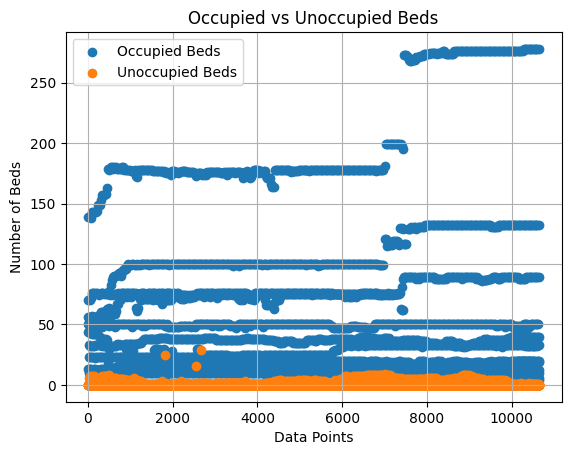

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

occupied = plt.scatter(range(len(daily_shelter_proc)), daily_shelter_proc['OCCUPIED_BEDS'], label='Occupied Beds')
unoccupied = plt.scatter(range(len(daily_shelter_proc)), daily_shelter_proc['UNOCCUPIED_BEDS'], label='Unoccupied Beds')

# Adding labels and title
plt.xlabel("Data Points")
plt.ylabel("Number of Beds")
plt.title("Occupied vs Unoccupied Beds")

# Add a legend
plt.legend()

# Add a grid
plt.grid()

# Show the plot
plt.show()
